In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [13]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 12

In [15]:
df = pd.read_csv("desafio_indicium_imdb.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [16]:
df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(int)
df["Gross"] = df["Gross"].str.replace(",","").astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


In [17]:
print(df.isnull().sum())

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


---

# **Tratamento da coluna "Certificate

In [18]:
df['Certificate'].fillna('Not Rated', inplace=True)

/tmp/ipython-input-1412793593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Not Rated', inplace=True)


---
# **Tratamento da coluna "Meta_score"**

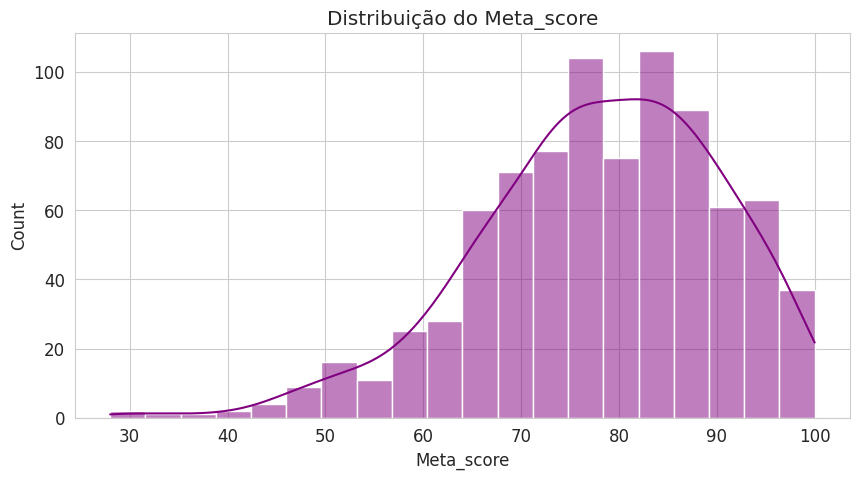

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Meta_score'].dropna(), kde=True, color='purple')
plt.title('Distribuição do Meta_score')
plt.show()

In [20]:
meta_mean = df['Meta_score'].mean()
meta_median = df['Meta_score'].median()
print(f"Média do Meta_score: {meta_mean:.2f}")
print(f"Mediana do Meta_score: {meta_median:.2f}")

Média do Meta_score: 77.97
Mediana do Meta_score: 79.00


In [21]:
df['Meta_score'].fillna(meta_median, inplace=True)

/tmp/ipython-input-116203160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(meta_median, inplace=True)


---

# **Tratamento da coluna "Meta_score"**

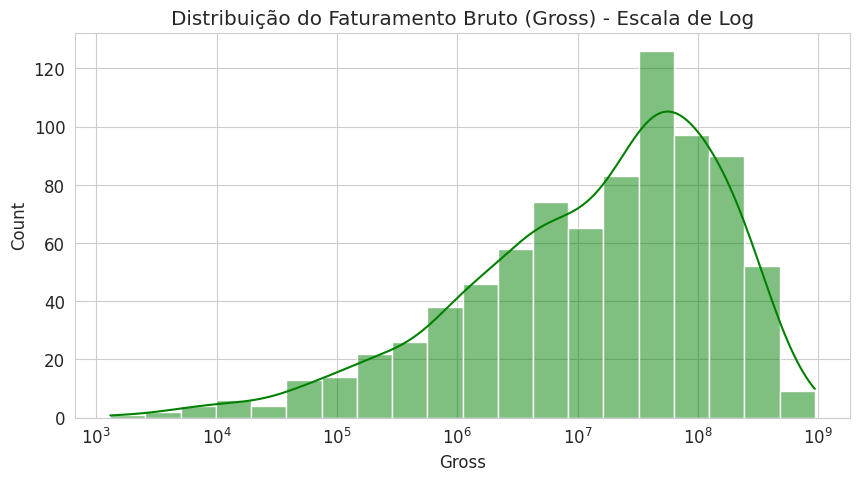

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Gross'].dropna(), kde=True, color='green', log_scale=True)
plt.title('Distribuição do Faturamento Bruto (Gross) - Escala de Log')
plt.show()

In [23]:
gross_mean = df['Gross'].mean()
gross_median = df['Gross'].median()
print(f"Média do Faturamento: ${gross_mean:,.2f}")
print(f"Mediana do Faturamento: ${gross_median:,.2f}")

Média do Faturamento: $68,082,574.10
Mediana do Faturamento: $23,457,439.50


In [24]:
df['Gross'].fillna(gross_median, inplace=True)

/tmp/ipython-input-3160985083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gross'].fillna(gross_median, inplace=True)


In [25]:
print(df.isnull().sum())

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


---

# **Tratando coluna "Released_Year"**

In [27]:
df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995

In [28]:
df['Released_Year'] = df['Released_Year'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.0+ KB


---

# **1. Análise Exploratória**

**Análise de faturamento por gênero**


In [30]:
df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_exploded = df_genres.explode('Genre')

In [31]:
median_gross_by_genre = df_exploded.groupby('Genre')['Gross'].median().sort_values(ascending=False)

/tmp/ipython-input-1943182047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exploded, x='Gross', y='Genre', order=median_gross_by_genre.index, palette='magma_r', showfliers=False)


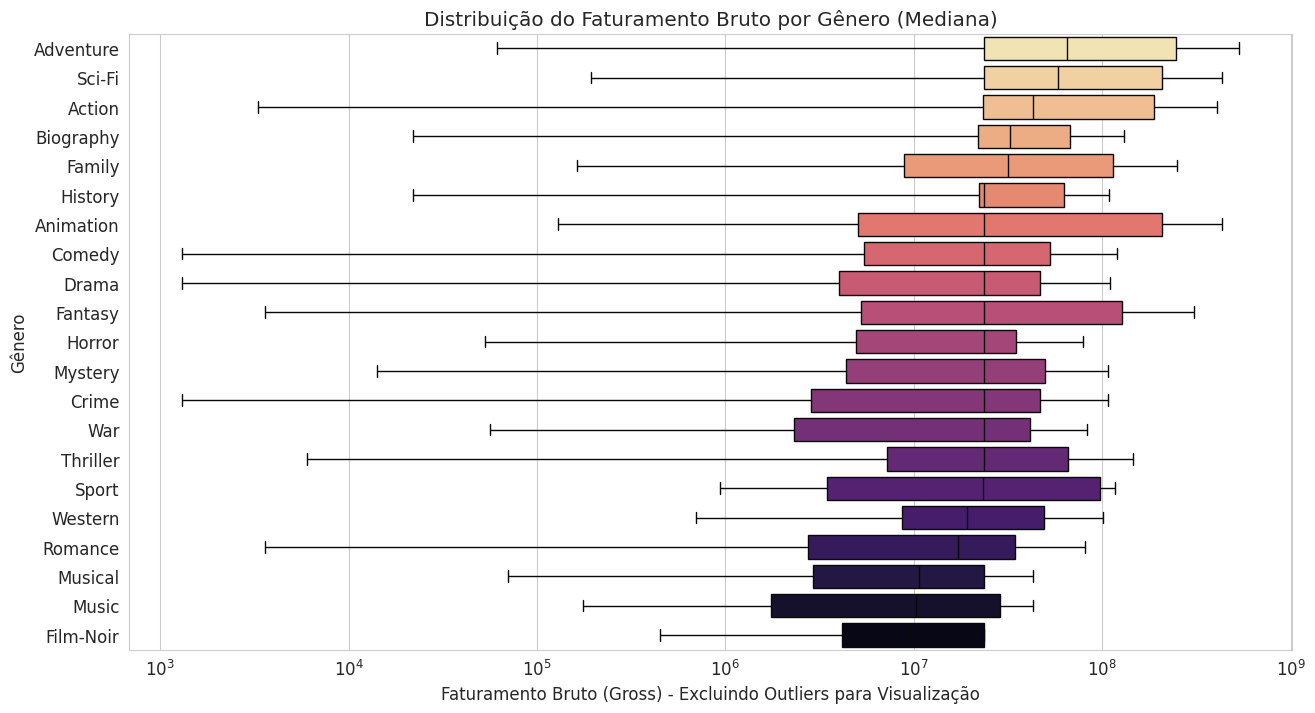

In [32]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_exploded, x='Gross', y='Genre', order=median_gross_by_genre.index, palette='magma_r', showfliers=False)
plt.title('Distribuição do Faturamento Bruto por Gênero (Mediana)')
plt.xlabel('Faturamento Bruto (Gross) - Excluindo Outliers para Visualização')
plt.ylabel('Gênero')
plt.xscale('log') # Escala de log é ótima para dados de faturamento
plt.show()

In [33]:
print("Top 5 Gêneros por Faturamento Mediano:")
print(median_gross_by_genre.head())

Top 5 Gêneros por Faturamento Mediano:
Genre
Adventure    64898511.0
Sci-Fi       57938693.0
Action       43000000.0
Biography    32572577.0
Family       31637200.0
Name: Gross, dtype: float64


---

**Análise Temporal**

In [34]:
df['Decade'] = (df['Released_Year'].astype(int) // 10) * 10

In [35]:
decade_analysis = df.groupby('Decade').agg({
    'IMDB_Rating': 'mean',
    'Runtime': 'mean',
    'Gross': 'mean',
    'No_of_Votes': 'mean'
}).reset_index()

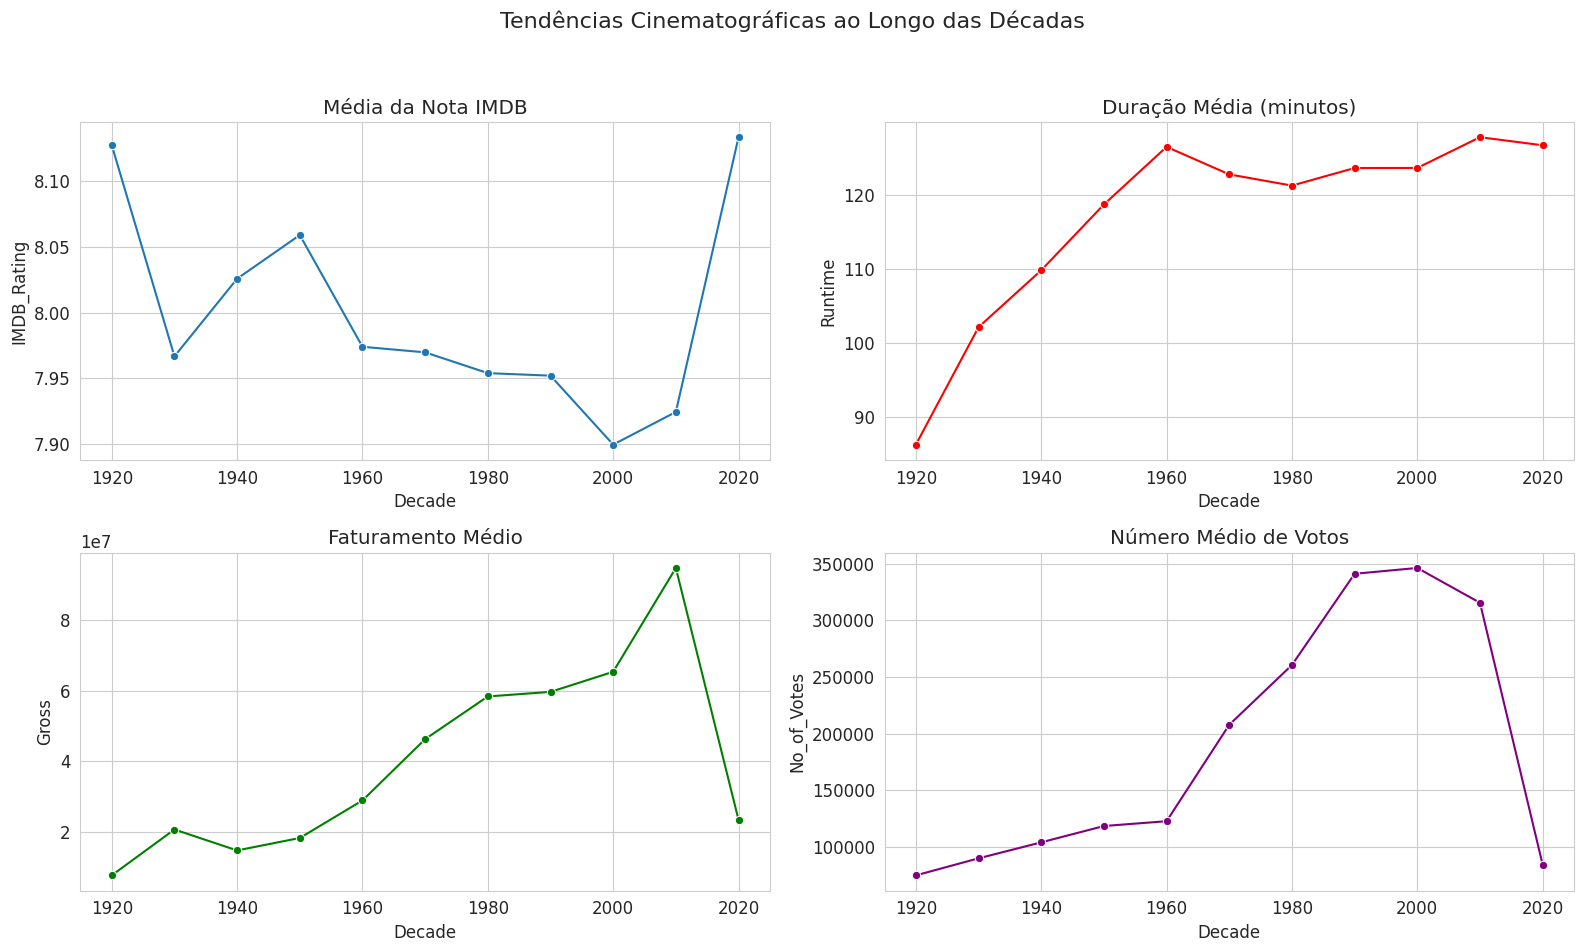

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Tendências Cinematográficas ao Longo das Décadas', fontsize=16)

sns.lineplot(ax=axes[0, 0], data=decade_analysis, x='Decade', y='IMDB_Rating', marker='o')
axes[0, 0].set_title('Média da Nota IMDB')

sns.lineplot(ax=axes[0, 1], data=decade_analysis, x='Decade', y='Runtime', marker='o', color='red')
axes[0, 1].set_title('Duração Média (minutos)')

sns.lineplot(ax=axes[1, 0], data=decade_analysis, x='Decade', y='Gross', marker='o', color='green')
axes[1, 0].set_title('Faturamento Médio')

sns.lineplot(ax=axes[1, 1], data=decade_analysis, x='Decade', y='No_of_Votes', marker='o', color='purple')
axes[1, 1].set_title('Número Médio de Votos')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

# **2. Perguntas**

---

**a. Qual filme você recomendaria para uma pessoa que você não conhece?**
- Recomendaria um filme com a maior probabilidade de agradar essa pessoa. Ou seja, um filme que tenha uma alta avaliação do público, alto número de votos.

In [37]:
recommendation = df.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False]).iloc[0]

In [38]:
print("O filme recomendado:")
print(f"Título: {recommendation['Series_Title']} ({recommendation['Released_Year']})")
print(f"Gênero: {recommendation['Genre']}")

print(f"Nota IMDB: {recommendation['IMDB_Rating']} de 10 (a mais alta do dataset).")
print(f"Número de Votos: {int(recommendation['No_of_Votes']):,} (uma das maiores votações.")

O filme recomendado:
Título: The Godfather (1972)
Gênero: Crime, Drama
Nota IMDB: 9.2 de 10 (a mais alta do dataset).
Número de Votos: 1,620,367 (uma das maiores votações.


---

b. **Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**
- Número de votos ("No_of_Votes")
- Ano de lançamento ("Released_Year")
- Avaliação do IMDB ("IMDB_Rating)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [48]:
features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', ]
target = 'Gross'

X = df[features]
y = df[target]

In [49]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [50]:
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

/tmp/ipython-input-2238824018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='inferno')


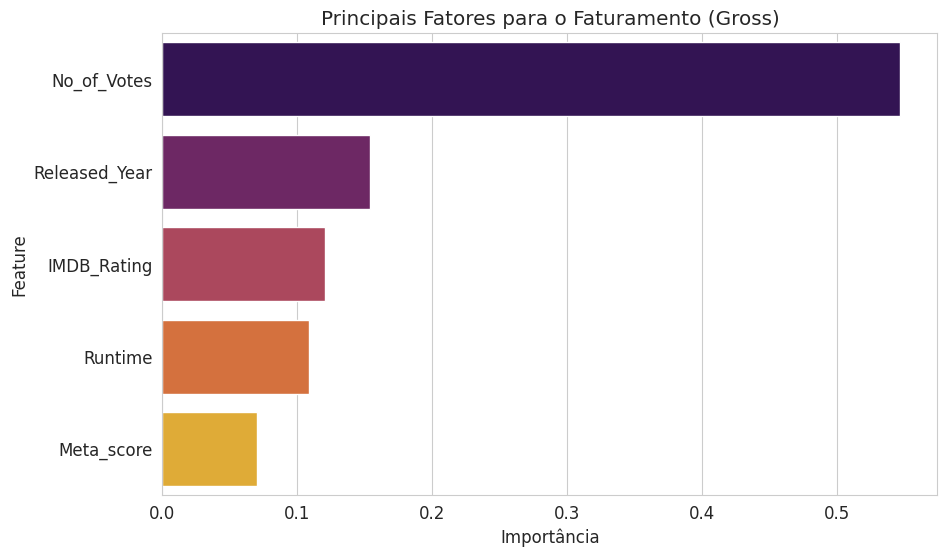

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='inferno')
plt.title('Principais Fatores para o Faturamento (Gross)')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

---

c. **Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**
- Sim, é possível. Com a coluna Overview, podemos fazer uma nuvem de palavras com os termos mais frequentes de cada gênero

In [52]:
from wordcloud import WordCloud

In [53]:
genre = "Music"
sci_fi_text = " ".join(overview for overview in df_exploded[df_exploded['Genre'] == genre]['Overview'])

In [54]:
wordcloud = WordCloud(background_color="black", collocations=False, width=800, height=400).generate(sci_fi_text)

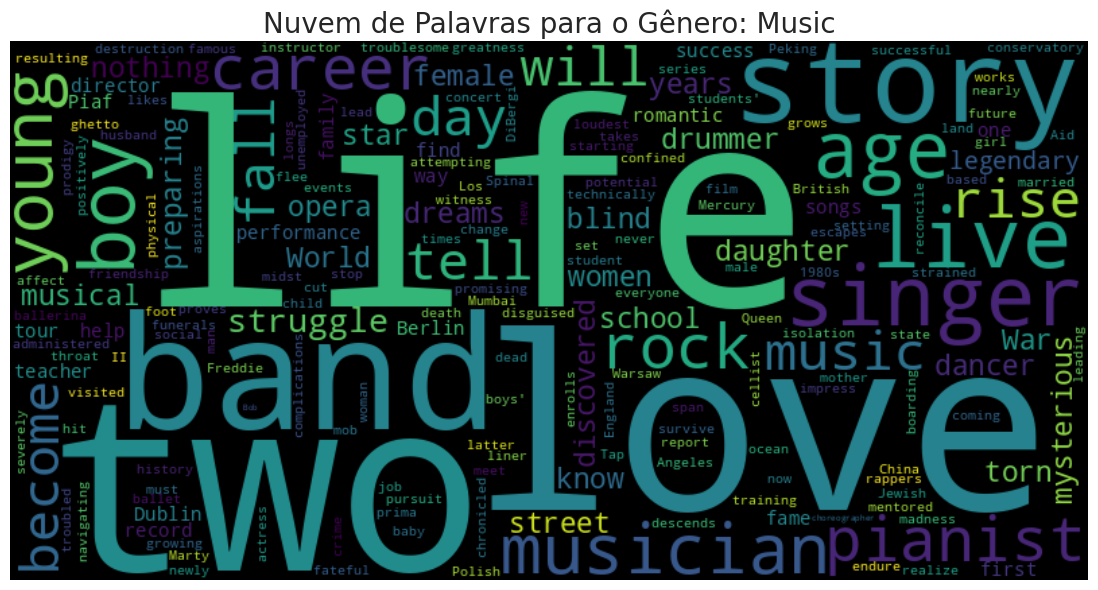

In [55]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Nuvem de Palavras para o Gênero: {genre}", fontsize=20)
plt.show()



---


# **3. Perguntas Nota IMDB**
**a. Explique como você faria a previsão da nota do imdb a partir dos dados.**
- Primeiramente, eu prepararia e limparia os dados, verificando a existencia de dados nulos e transformando algumas colunas para números
- Definiria as colunas que seriam usadas como as "Features" e o "Target"
- Separaria os dados em dados de teste e treinamento
- Treinaria o modelo usando algum algoritmo de machine learning
- Realizaria a predição usando o modelo treinado
- Caso necessário, faria mudança em alguns hiperparametros para melhorar a performace do modelo

b. **Quais variáveis e/ou suas transformações você utilizou e por quê?**
- Utilizei como variavel: Runtime, Meta_score, No_of_Votes, Gross, Movie_age, Main_Genre e Director
- Fiz transformações em Runtime e Gross, removendo os textos contidos neste dado e converti para número, pois modelos matematicos não conseguem textos misturados só numeros.
- Criei o Movie_age, porque é uma feature mais intuitiva do que Realease_Year
- Crei o Main_Genre para dar uma simplificada para o modelo e deixar mais direta e facil dele aprender
- Utilizei a técnica One-Hot Enconding em Main_Genre e Director, pois o modelo não entende texto, então essa técnica converte cada categoria para valores númericos

**c. Qual tipo de problema estamos resolvendo (regressão, classificação)?**
- Estamos resolvendo um problema de regressão, pois prever o IMDB_Rating é um valor númerico e contínuo, logo, é um problema de regressão.

**d. Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**-
- Utilizei o modelo XGBoost Regressor, pois é um modelo bom para trabalhar com dados tabulares.

**e. Qual medida de performance do modelo foi escolhida e por quê?**
- Utilizei o RMSE, pois o resultado está na mesma unidade da nota do IMDB, o RMSE diz, em média, quantos pontos o modelo erra em suas previsões. Ex: 0.1 significa que o modelo esta errando na média de 0.1 pontos.
- O RMSE penaliza os maiores erros, ou seja, caso haja um erro muito grande, ele será penalizado muito mais que um erro pequeno. Ele faz isso calculando a diferença entre as previsões e os valores reais e elevando ao quadrado.




---


# **4. Previsão Nota IMDB**
- A previsão da nota para o novo filme é 8.8

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [68]:
current_year = 2025
df['Movie_Age'] = current_year - df['Released_Year']


In [69]:
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

In [71]:
numerical_features = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross', 'Movie_Age']
categorical_features = ['Main_Genre', 'Director']

features = numerical_features + categorical_features
target = 'IMDB_Rating'

In [88]:
X = df[numerical_features + categorical_features]
y = df['IMDB_Rating']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [91]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])

In [92]:
model_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Runtime', 'Meta_score',
                                                   'No_of_Votes', 'Gross',
                                                   'Movie_Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Main_Genre',
                                                   'Director'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytr...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [101]:
predictions = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

np.float64(0.08271453288519805)

In [94]:
new_movie_data = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

In [95]:
new_movie_df = pd.DataFrame([new_movie_data])

In [96]:
new_movie_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [97]:
new_movie_df['Runtime'] = new_movie_df['Runtime'].str.replace(' min', '').astype(int)
new_movie_df['Gross'] = new_movie_df['Gross'].str.replace(',', '').astype(float)
new_movie_df['Released_Year'] = new_movie_df['Released_Year'].astype(int)
new_movie_df['Movie_Age'] = current_year - new_movie_df['Released_Year']
new_movie_df['Main_Genre'] = new_movie_df['Genre'].apply(lambda x: x.split(',')[0])

In [98]:
new_movie_df[features].head()

,Runtime,Meta_score,No_of_Votes,Gross,Movie_Age,Main_Genre,Director
0,142,80.0,2343110,28341469.0,31,Drama,Frank Darabont


In [99]:
predicted_rating = model_pipeline.predict(new_movie_df)
final_prediction = predicted_rating[0]

In [100]:
print(f"A nota IMDB PREVISTA para 'The Shawshank Redemption' é:")
print(f" >> {final_prediction:.2f} << ")

A nota IMDB PREVISTA para 'The Shawshank Redemption' é:
 >> 8.80 << 




---

# **Salvando o modelo**

In [103]:
import pickle

In [102]:
filename = 'imdb_rating_predictor.pkl'

In [104]:
with open(filename, 'wb') as file:
    pickle.dump(model_pipeline, file)